In [1]:
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
import os
import requests
import pandas as pd
import alpaca_trade_api as trade_api
from alpaca_trade_api.rest import REST, TimeFrame

In [4]:
# Cryptto amount :
btc_amount = 1.2
eth_amount = 5.3
monthly_income = 12000

In [5]:
url_btc =  'https://api.alternative.me/v2/ticker/bitcoin/?convert=CAD'
url_eth =  'https://api.alternative.me/v2/ticker/ethereum/?convert=CAD'

In [6]:
response_btc = requests.get(url_btc)
response_eth = requests.get(url_eth)

In [7]:
# this point to be noted.
btc_data = response_btc.content
eth_data=response_eth.content

import json
btc = response_btc.json()


In [8]:
eth = response_eth.json()

In [9]:
eth['data']['1027'].keys()

dict_keys(['id', 'name', 'symbol', 'website_slug', 'rank', 'circulating_supply', 'total_supply', 'max_supply', 'quotes', 'last_updated'])

In [10]:
btc_price = btc['data']['1']['quotes']['CAD']['price']
eth_price = eth['data']['1027']['quotes']['CAD']['price']
btc_price

56472.7842

In [11]:
btc_portfolio_value = btc_price*btc_amount
print(f'BTC portfolio value :{round(btc_portfolio_value,2)}')

BTC portfolio value :67767.34


In [12]:
eth_portfolio_value = eth_price*eth_amount
print(f'ETH portfolio value :{round(eth_portfolio_value,2)}')

ETH portfolio value :21743.48


In [13]:
# Amoount of shares :
spy_shares = 50
agg_shares = 200

In [14]:
alpaca_key = os.getenv('ALACA_KEY')
alpaca_secret = os.getenv('ALPACA_SECRET')
type(alpaca_key)

str

In [15]:
alpaca = trade_api.REST(alpaca_key,alpaca_secret,api_version='v2')

In [16]:
tickers = ['SPY','AGG']

In [17]:
data = alpaca.get_bars(tickers,TimeFrame.Day,'1982-03-24','2022-03-24',adjustment ='raw').df

In [18]:
data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,108.54,108.8400,108.43,108.82,4259986,15562,108.754152,AGG
2015-12-02 05:00:00+00:00,108.73,108.7799,108.61,108.67,2462787,11581,108.684692,AGG
2015-12-03 05:00:00+00:00,108.41,108.4100,107.81,107.89,4634020,16801,108.040315,AGG
2015-12-04 05:00:00+00:00,108.05,108.3000,108.00,108.24,2182057,9796,108.192232,AGG
2015-12-07 05:00:00+00:00,108.30,108.5800,108.23,108.40,2143773,9104,108.460067,AGG


In [19]:
spy = data[data['symbol'] == 'SPY'].drop('symbol' , axis = 1)
agg = data[data['symbol']== 'AGG'].drop('symbol' , axis = 1)

In [20]:
spy.tail()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-03-18 04:00:00+00:00,437.81,444.86,437.22,444.31,102327793,790235,441.458916
2022-03-21 04:00:00+00:00,444.45,446.46,440.68,444.30,85377983,912432,443.796432
2022-03-22 04:00:00+00:00,445.99,450.58,445.86,449.59,73674202,623610,448.558595
2022-03-23 04:00:00+00:00,446.90,448.49,443.71,443.80,77982935,627281,446.058683
2022-03-24 04:00:00+00:00,445.82,450.50,444.76,450.48,61411569,526865,447.609014


In [21]:
# computing value in dollars of the current amount of shares :
spy_last_close = spy['close'][-1]
agg_last_close=agg['close'][-1]
dollar_amount_spy = spy_last_close*spy_shares
dollar_amount_agg = agg_last_close*agg_shares
print(f'Dollar amount of spy shares : {dollar_amount_spy}')
print(f'Dollar amount of agg shares : {dollar_amount_agg}')

Dollar amount of spy shares : 22524.0
Dollar amount of agg shares : 21390.0


In [22]:
# Savings Health Analysis:

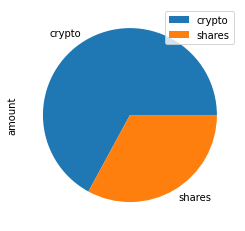

In [23]:
df_savings = pd.DataFrame(
    {'crypto' : [eth_portfolio_value+btc_portfolio_value],
     'shares' : [dollar_amount_agg+dollar_amount_spy]
    })
df_savings = df_savings.T
df_savings.rename(columns={0:'amount'},inplace = True)
savings_pie_chart = df_savings.plot(kind = 'pie',subplots = True)

In [24]:
if float(df_savings.iloc[0].values+df_savings.iloc[1].values) > monthly_income*3:
    print('Congratulations you have more than the threshold')
elif float(df_savings.iloc[0].values+df_savings.iloc[1].values) == monthly_income*3:
    print('Congratulations your savings have reached the required target')
elif float(df_savings.iloc[0].values+df_savings.iloc[1].values) < monthly_income*3:
    differnce = float(df_savings.iloc[0].values+df_savings.iloc[1].values) - (monthly_income*3)
    print(f'you must save {differnce} $ more to acheive your savings goal')

Congratulations you have more than the threshold


In [25]:
# Retirement Planning :

In [26]:
df =pd.concat([spy,agg],axis = 'columns',keys = ['spy','agg'] )

In [27]:
df.index = df.index.date

In [28]:
df.head()

spy                                                     \
              open      high       low   close     volume trade_count   
2015-12-01  209.42  210.8200  209.1100  210.68   97858418      337780   
2015-12-02  210.60  211.0000  208.2300  208.54  108069059      367013   
2015-12-03  208.90  209.1500  204.7511  205.58  166224154      546768   
2015-12-04  206.10  209.9700  205.9300  209.66  192878747      556731   
2015-12-07  209.20  209.7295  207.2000  208.27  102027111      374705   

                           agg                                                 \
                  vwap    open      high     low   close   volume trade_count   
2015-12-01  209.921410  108.54  108.8400  108.43  108.82  4259986       15562   
2015-12-02  209.563055  108.73  108.7799  108.61  108.67  2462787       11581   
2015-12-03  206.878936  108.41  108.4100  107.81  107.89  4634020       16801   
2015-12-04  208.178631  108.05  108.3000  108.00  108.24  2182057        9796   
2015-12-07  208.276128  108.30  108.5800  108.23  108.40  2143773        9104   

                        
                  vwap  
2015-12-01  108.754152  
2015-12-02  108.684692  
2015-12-03  108.040315  
2015-12-04  108.192232  
2015-12-07  108.460067

In [29]:
from MCForecastTools import MCSimulation

In [30]:
weights = [.6,.4]

In [39]:
simulation = MCSimulation(portfolio_data = df,  weights= [.4,.6] , num_simulation = 500 ,num_trading_days = 252*30)

In [40]:
simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Zahra\Desktop\API_HomeWork\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010824,1.005871,1.003611,0.991425,0.996410,1.005519,0.996380,1.003706,1.001413,0.998786,...,1.001501,1.000997,0.998954,0.996226,1.000798,0.997558,0.993458,1.006800,1.009045,1.009050
2,1.010529,1.013613,1.001105,0.985144,0.996265,1.003361,0.993295,1.007301,1.005467,0.996842,...,1.008013,0.994756,1.009429,1.001619,0.997297,0.996624,0.985842,1.011129,1.008536,0.998173
3,1.009939,1.015219,1.010469,0.993557,0.995639,1.015318,0.996410,1.008718,1.010507,1.003451,...,1.008230,1.000492,1.006758,1.003186,0.994159,1.000507,0.980638,1.009597,1.014141,0.997143
4,1.002763,1.018930,1.012433,0.991070,1.002627,1.012404,0.992054,1.009470,1.022924,1.004999,...,0.999032,1.002849,1.002516,0.998464,1.000497,1.001717,0.977282,1.008167,1.010521,1.001230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.749059,3.841277,7.400000,7.356906,5.099891,3.516531,4.427326,7.069820,3.565783,2.822224,...,4.740987,2.345735,4.280097,5.418509,2.735279,5.429478,4.991779,8.162566,2.618253,2.257515
7557,5.739004,3.839315,7.361021,7.368016,5.104572,3.540057,4.449294,7.064781,3.573512,2.820295,...,4.719497,2.349813,4.239283,5.435777,2.744831,5.470026,4.951140,8.236785,2.649555,2.277554
7558,5.717295,3.860864,7.301773,7.308972,5.100571,3.551411,4.453762,7.072521,3.601847,2.838936,...,4.697344,2.351586,4.235999,5.426530,2.736812,5.482552,4.966241,8.240716,2.630805,2.277118
7559,5.727747,3.840785,7.273375,7.283546,5.126667,3.549742,4.455242,7.077583,3.596960,2.851422,...,4.685241,2.353330,4.241898,5.436098,2.736684,5.464125,4.958670,8.301148,2.617614,2.284267


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

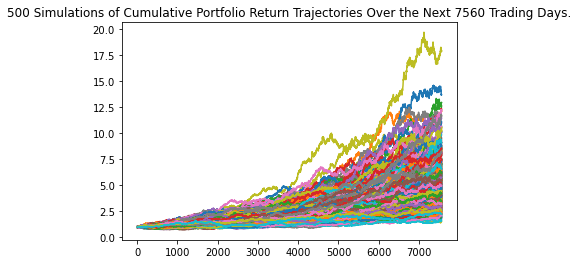

In [64]:
simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

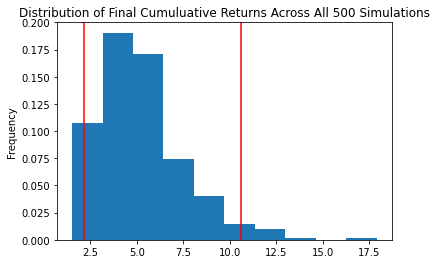

In [65]:
simulation.plot_distribution()

In [43]:
stats = simulation.summarize_cumulative_return()
stats

count           500.000000
mean              5.173477
std               2.244333
min               1.515433
25%               3.483355
50%               4.835050
75%               6.206473
max              17.890386
95% CI Lower      2.138689
95% CI Upper     10.605993
Name: 7560, dtype: float64

In [44]:
initial_investment = 20000
ci_upper = stats[9]*initial_investment
ci_lower = stats[8]*initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')

Expected portfolio returns with 95% upper confidence interval : 212119.86
Expected portfolio returns with 95% lower confidence interval : 42773.78


In [76]:
mean_return = round((((stats[1]*initial_investment)-initial_investment)/initial_investment)*100,2)
mean_return

126.61

In [45]:
increased_initial_investment = initial_investment*1.5
ci_upper = stats[9]*increased_initial_investment
ci_lower = stats[8]*increased_initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')

Expected portfolio returns with 95% upper confidence interval : 318179.79
Expected portfolio returns with 95% lower confidence interval : 64160.67


In [38]:
# Early Retirement :

In [77]:
#  By Increasing the weight of spy to 60 % :
inc_risk = MCSimulation(portfolio_data = df,  weights= [.6,.4] , num_simulation = 500 ,num_trading_days = 252*10)

In [78]:
inc_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Zahra\Desktop\API_HomeWork\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992925,1.006729,0.999851,0.993750,0.999572,0.989848,1.001832,0.989426,0.984528,1.006795,...,1.010881,0.998018,1.003279,1.002564,1.005033,1.004257,1.003672,1.002330,0.996560,1.001575
2,0.989182,1.001200,1.008310,0.996598,0.997008,0.983500,0.999346,0.975507,0.987618,1.008626,...,1.014584,0.995746,1.000227,0.999400,1.012747,0.991177,0.982155,1.022676,0.993151,1.001118
3,0.993493,1.003226,0.996239,0.998107,1.007047,0.980835,1.000843,0.982443,0.987844,1.015854,...,1.007167,0.981055,1.013427,0.979214,1.005299,0.992629,0.988637,1.028099,0.996062,0.985589
4,0.996456,1.009988,0.995176,0.997011,1.004342,0.984702,0.997555,0.995241,0.986095,1.022366,...,0.999973,0.985017,1.012647,0.978676,0.998977,0.993795,0.991505,1.027149,1.001147,0.975525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.081575,1.706645,1.617155,1.371085,1.625903,1.343693,2.079023,1.902791,2.478950,3.200782,...,2.009765,1.325621,1.454335,1.329221,2.035149,1.405165,2.577279,1.575895,0.986238,2.143239
2517,2.080704,1.719526,1.611968,1.382779,1.610356,1.355337,2.077044,1.906628,2.479472,3.195233,...,2.017847,1.330967,1.456286,1.324838,2.043531,1.410448,2.566694,1.575235,0.992351,2.150010
2518,2.089197,1.709379,1.615420,1.370880,1.617624,1.346953,2.066085,1.904528,2.461239,3.209906,...,2.025758,1.313736,1.436556,1.316427,2.041155,1.410182,2.551700,1.563786,0.995988,2.145622
2519,2.095547,1.744721,1.608550,1.384804,1.613552,1.360725,2.068195,1.878910,2.482585,3.241562,...,2.042579,1.294458,1.433364,1.319397,2.025404,1.414406,2.557563,1.568349,1.005456,2.144948


In [79]:
stats_risk= inc_risk.summarize_cumulative_return()
stats_risk

count           500.000000
mean              2.241495
std               0.775392
min               0.819871
25%               1.675459
50%               2.096312
75%               2.694139
max               5.170628
95% CI Lower      1.127573
95% CI Upper      4.216807
Name: 2520, dtype: float64

In [80]:
ci_upper = stats_risk[9]*initial_investment
ci_lower = stats_risk[8]*initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')

Expected portfolio returns with 95% upper confidence interval : 84336.13
Expected portfolio returns with 95% lower confidence interval : 22551.46


In [81]:
mean_risky_return = round((((stats_risk[1]*initial_investment)-initial_investment)/initial_investment)*100,2)
mean_risky_return

124.15

The above calculation shows that with 60% investments in stocks we can have approximately same mean returns in 10 years ,that were possible with 40% investments in stocks in 30 years.

In [82]:
# To achieve the same result with same risk apetite in 10 years , we can increase the amount of initial investment:

In [84]:
sim_inc_investment = MCSimulation(portfolio_data = df,  weights= [.4,.6] , num_simulation = 500 ,num_trading_days = 252*10)

In [85]:
sim_inc_investment.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Zahra\Desktop\API_HomeWork\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996175,1.008141,1.005893,0.999295,0.995692,1.003085,0.996108,0.995911,1.002749,1.002124,...,1.001148,0.999839,1.001027,1.003998,0.995950,0.998029,1.000928,0.997651,0.993676,0.996389
2,0.998817,1.010433,1.000172,1.000797,0.997348,1.008980,0.992465,0.996386,0.995067,0.998946,...,0.995351,0.997515,0.997685,1.005876,0.997082,0.997106,1.012876,0.996626,0.993142,0.995130
3,1.005055,1.011038,1.005959,0.991053,0.994338,1.011864,1.001398,0.986940,0.992485,1.008124,...,0.990644,0.998640,0.996829,1.013778,0.997509,0.996632,1.015122,0.997992,0.995311,0.988778
4,1.004379,1.008472,0.998697,0.995928,0.992645,1.015308,0.997118,0.988223,0.982979,1.008913,...,0.989533,0.997795,0.995146,1.008385,1.000909,0.996285,1.016275,1.002374,0.998982,0.983915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.729277,2.819424,2.073682,1.533780,2.445443,2.324205,1.955234,1.612215,1.796383,1.399840,...,1.701584,1.478077,1.800580,2.365181,2.138205,2.478512,1.370475,1.037747,1.675272,1.528424
2517,1.726165,2.823102,2.078410,1.533025,2.422237,2.335581,1.966696,1.614278,1.801361,1.392489,...,1.705903,1.470363,1.815485,2.381832,2.159295,2.464776,1.372953,1.038307,1.691945,1.519893
2518,1.731087,2.827225,2.079610,1.539552,2.436259,2.320198,1.989083,1.605815,1.796754,1.382583,...,1.713545,1.463831,1.824952,2.389306,2.160371,2.466576,1.384955,1.037256,1.697516,1.518022
2519,1.723883,2.841579,2.104137,1.534024,2.434748,2.331391,1.986274,1.622340,1.810880,1.397485,...,1.704135,1.467243,1.829194,2.386190,2.167082,2.474044,1.394776,1.045846,1.692591,1.508108


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

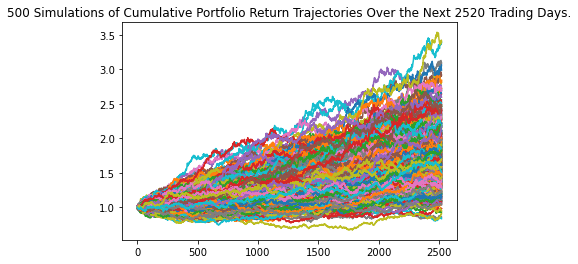

In [105]:
sim_inc_investment.plot_simulation()

In [106]:
sim_inc_investment_stats=sim_inc_investment.summarize_cumulative_return()
sim_inc_investment_stats

count           500.000000
mean              1.722175
std               0.409969
min               0.833681
25%               1.431682
50%               1.685634
75%               1.975514
max               3.401992
95% CI Lower      1.069730
95% CI Upper      2.670428
Name: 2520, dtype: float64

In [117]:
required_investment = 30000
ci_upper = sim_inc_investment_stats[9]*initial_investment
ci_lower = sim_inc_investment_stats[8]*initial_investment
print(f'Expected portfolio returns with 95% upper confidence interval : {round(ci_upper,2)}')
print(f'Expected portfolio returns with 95% lower confidence interval : {round(ci_lower,2)}')

Expected portfolio returns with 95% upper confidence interval : 80112.84
Expected portfolio returns with 95% lower confidence interval : 32091.89


With 30,000 initial investment , same returns can be expected in 10 years that are possible with 20,000 but in 30 years.